<span style="color:white; font-size:4rem" >Visualization</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

array([[<Axes: title={'center': 'release_year'}>]], dtype=object)

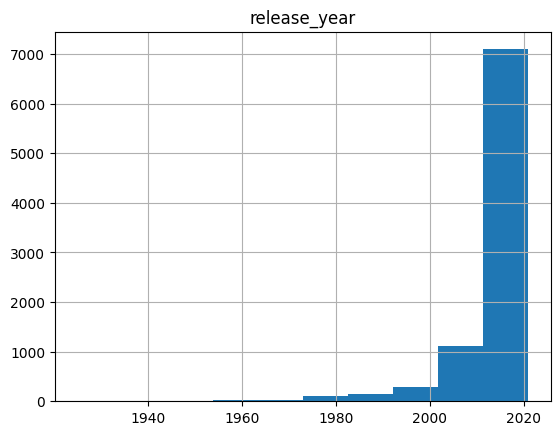

In [11]:
df.hist('release_year')

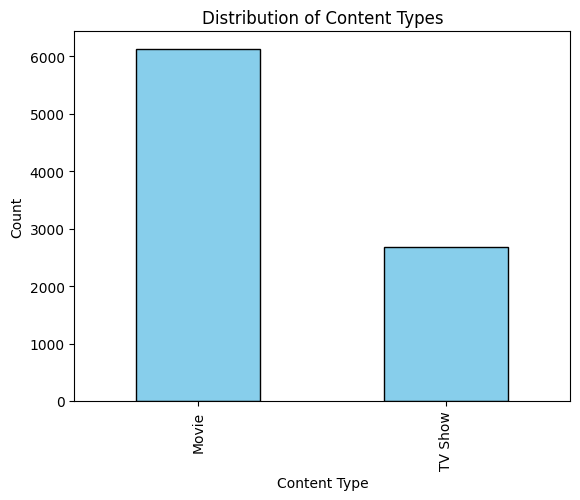

In [12]:
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')

plt.show()

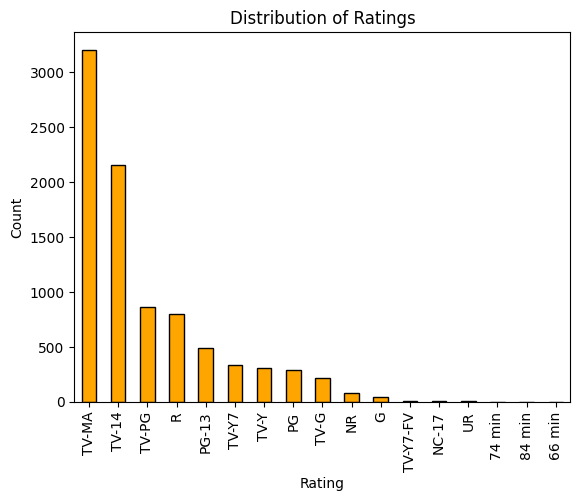

In [13]:
rating_counts = df['rating'].value_counts()
rating_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

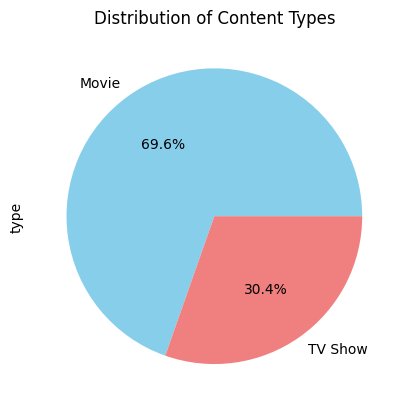

In [14]:
type_counts = df['type'].value_counts()
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Content Types')
plt.show()

<span style="color:white; font-size:4rem" >Cleaning</span>

In [15]:
df = df.drop_duplicates()

In [16]:
df['type'].fillna('Unknown', inplace=True)

In [17]:
df = df.dropna(subset=['title', 'release_year', 'listed_in', 'description'])

In [18]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
# df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [19]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [20]:
netflix_shows = df[df['type'] == 'TV Show'].copy()
netflix_movies = df[df['type'] == 'Movie'].copy()
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date



,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September
...,...,...,...
8795,"May 1, 2018",2018,May
8796,"January 17, 2017",2017,January
8797,"September 13, 2018",2018,September
8800,"December 15, 2016",2016,December


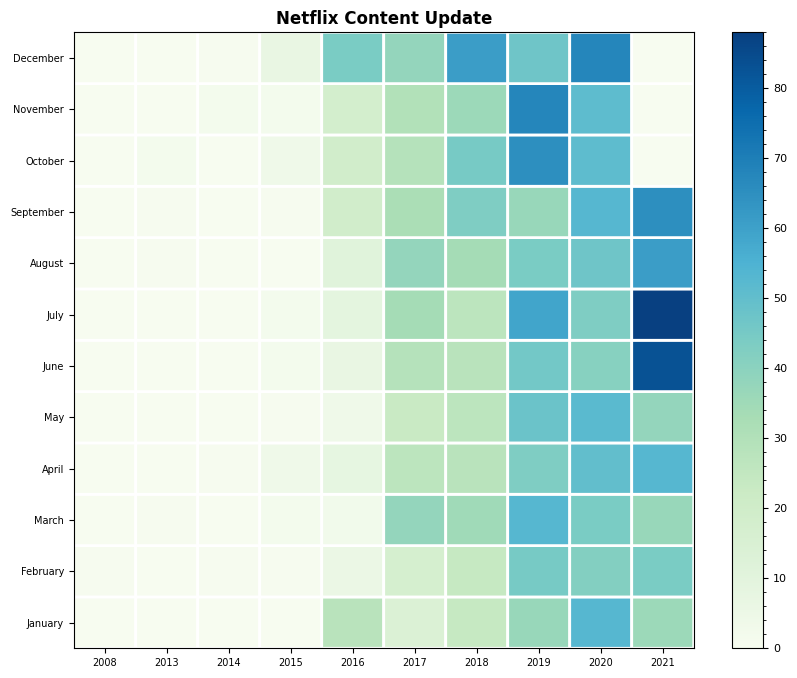

In [21]:
netflix_date.sort_values(by =['year', 'month'])
netflix_date['month'].unique()

month_order = ['January', 'February','March','April', 'May','June', 'July', 'August', 'September','October','November', 'December']
drt = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
drt
plt.figure(figsize = (10,8), dpi = 100)
plt.pcolor(drt, cmap = 'GnBu',edgecolors = 'white', linewidths = 2)
plt.xticks(np.arange(0.5, len(drt.columns), 1),drt.columns, fontsize = 7)
plt.yticks(np.arange(0.5, len(drt.index), 1), drt.index, fontsize = 7)

plt.title('Netflix Content Update', fontsize = 12, fontweight = 'bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show()

<Figure size 1000x600 with 0 Axes>

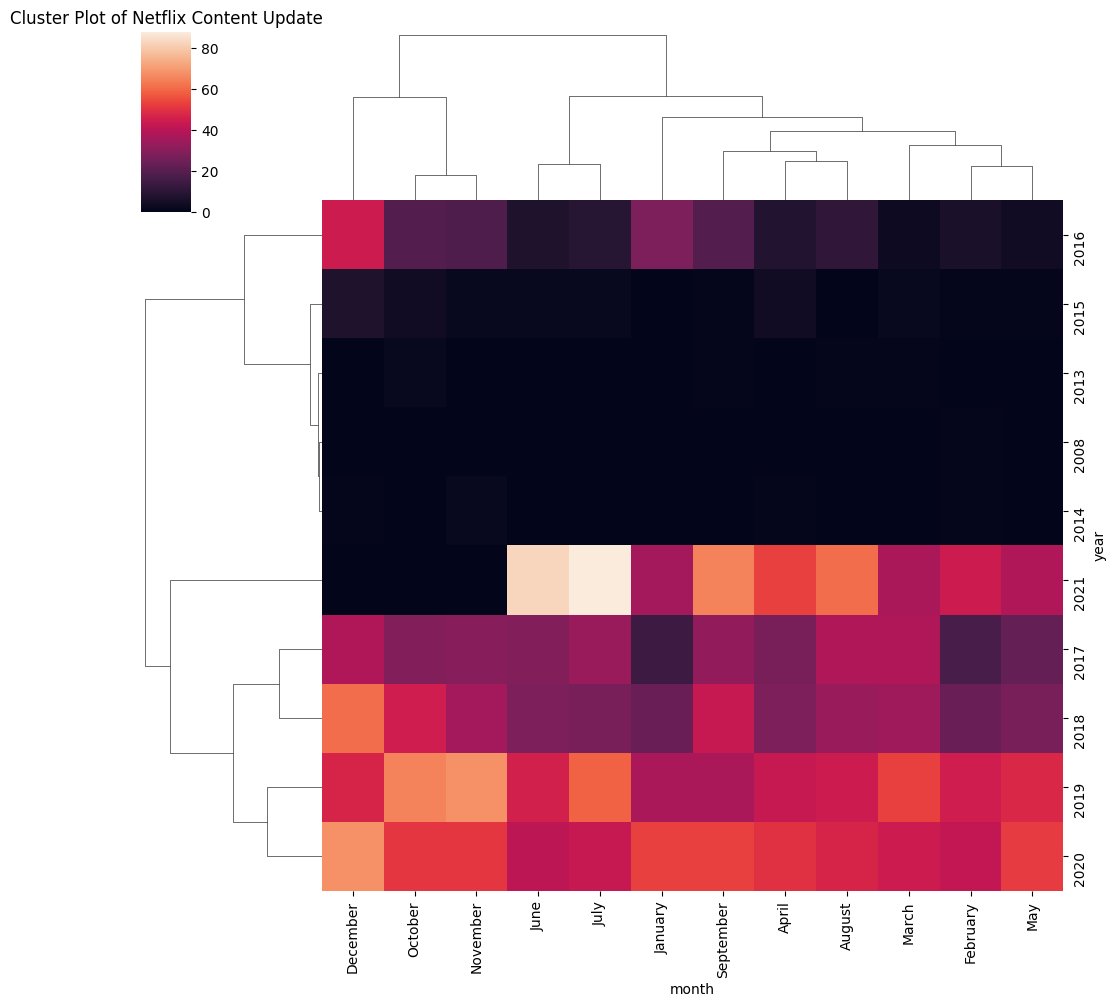

In [23]:
plt.figure(figsize=(10, 6), dpi=100)
sns.clustermap(netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order])
plt.title('Cluster Plot of Netflix Content Update')
plt.show()

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
columns_to_clean = ['title', 'description', 'country']

for column in columns_to_clean:
    df[column] = df[column].apply(clean_text)

In [ ]:
df = df[~df['rating'].str.contains('min')]

In [ ]:
df.head(14)

<span style="color:white; font-size:4rem" >Analysis</span>

In [ ]:
genre_distribution = df['listed_in'].str.split(', ', expand=True).stack().value_counts()
genre_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
country_distribution = df['country'].value_counts().head(10)
country_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Countries with Most Productions')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

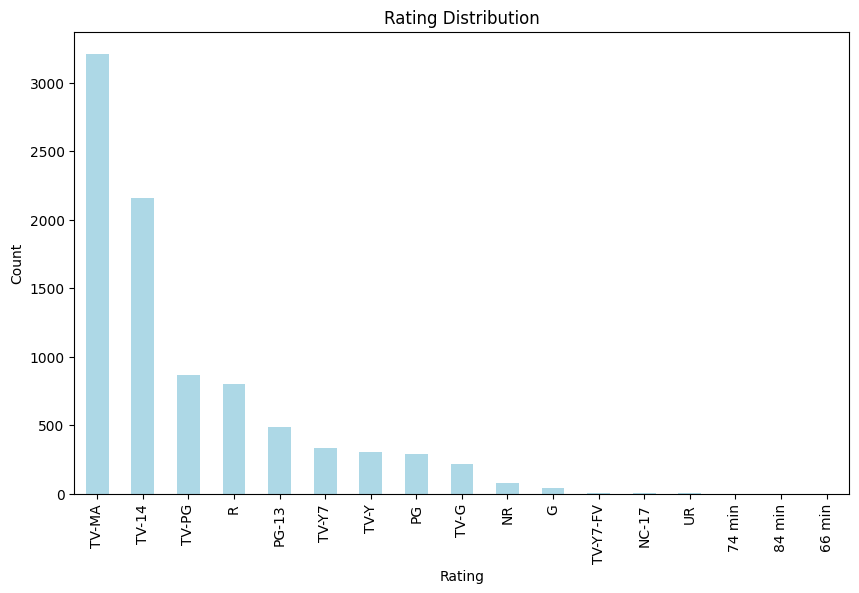

In [31]:
rating_distribution = df['rating'].value_counts()
rating_distribution.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [30]:
df['month_added'] = df['date_added'].dt.month
release_trend_monthly = df.groupby('month_added')['title'].count()
release_trend_monthly.plot(kind='line', marker='o', color='skyblue')
plt.title('Release Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

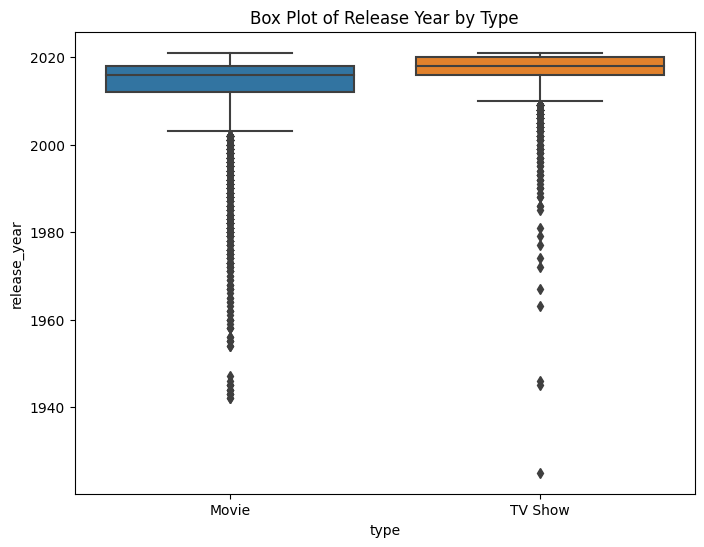

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Box Plot of Release Year by Type')
plt.show()

C:\Users\Deepali\AppData\Local\Temp\ipykernel_17572\1136047179.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='type', y='rating', data=df, jitter=True, palette='Set2')


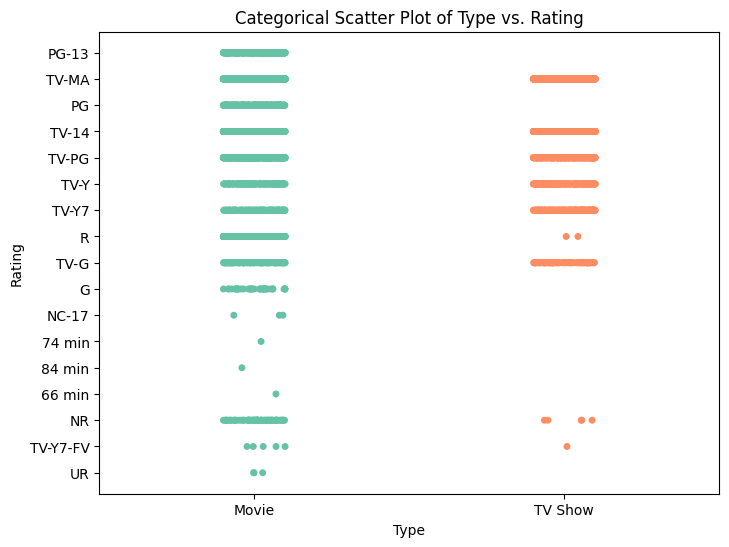

In [28]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='type', y='rating', data=df, jitter=True, palette='Set2')
plt.title('Categorical Scatter Plot of Type vs. Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

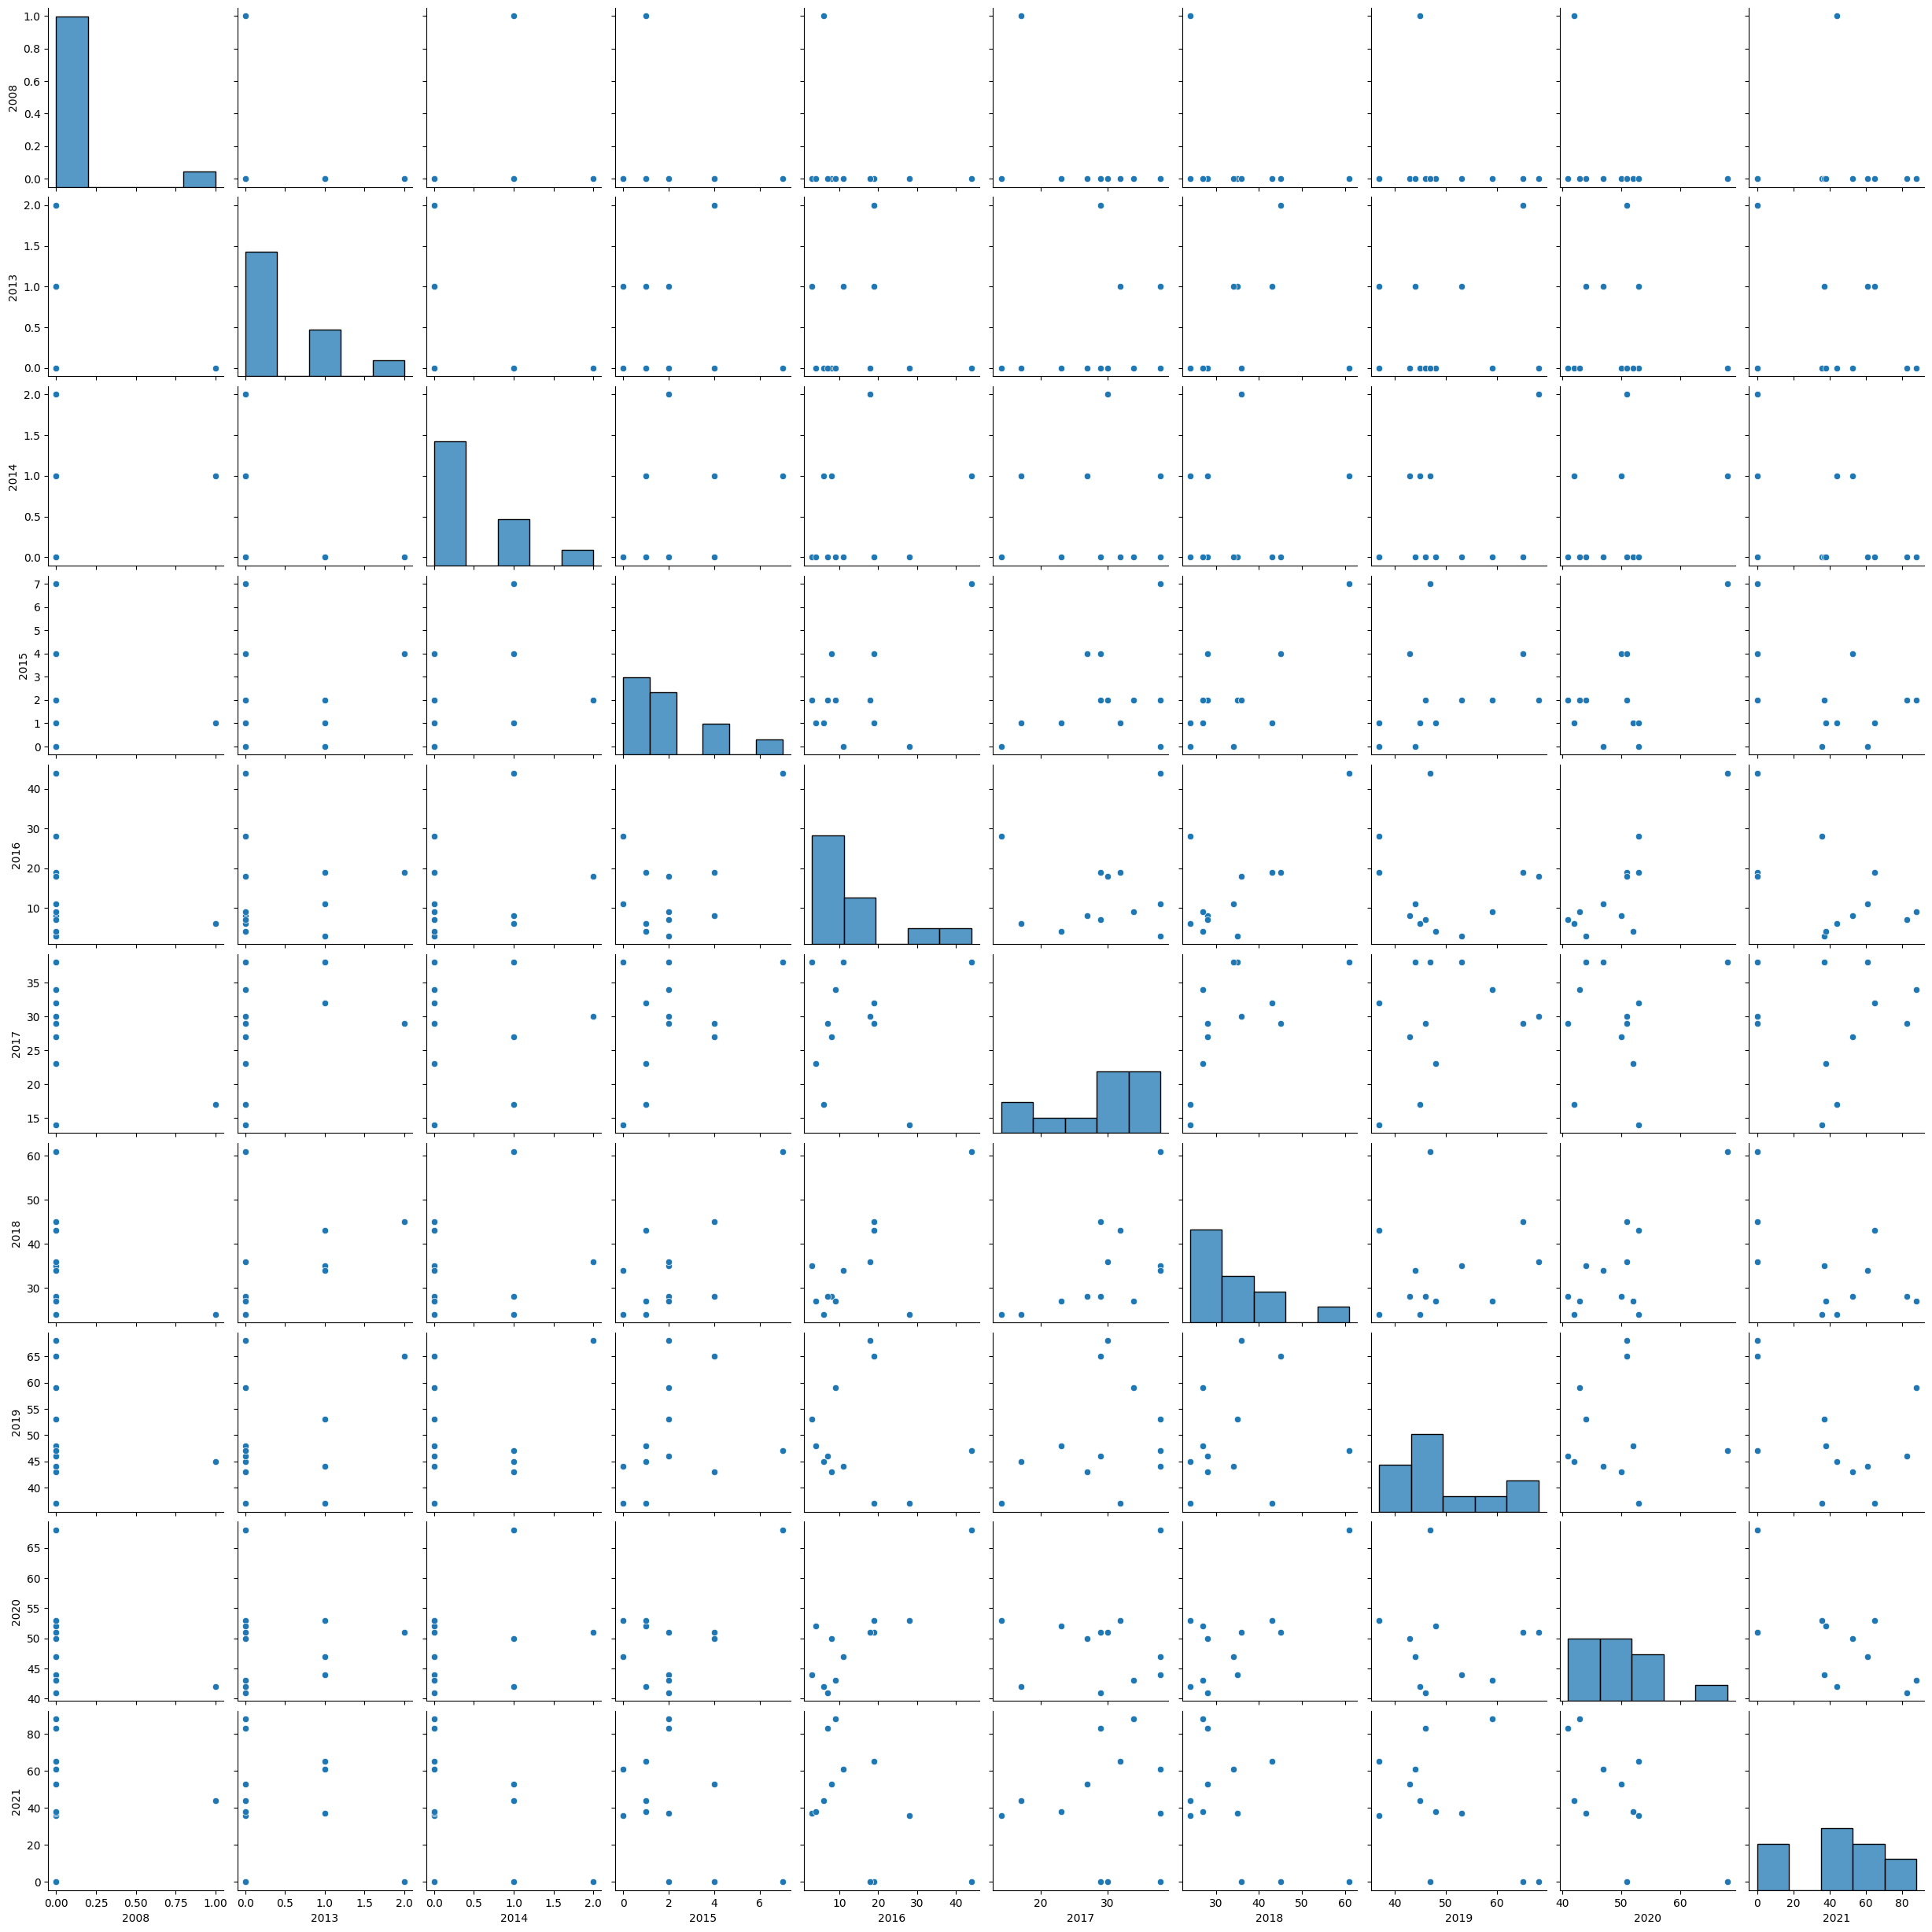

In [34]:
sns.pairplot(drt)


C:\Users\Deepali\AppData\Local\Temp\ipykernel_17572\79748460.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numeric.corr()


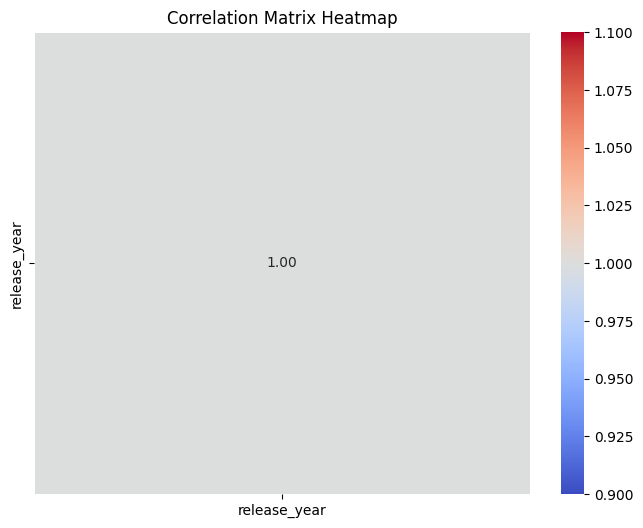

In [27]:
numerical_columns = ['release_year', 'duration']

# Select numerical columns from the DataFrame
df_numeric = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()